In [19]:
# Hodgkin-Huxley Model 仿真实验
'''
    用Python和欧拉法求解HH模型，形成实验报告
    画出不同离子通道的门控变量的变化图，深刻体会离子通道的开关如何影响细胞膜电位的变化
    自学动力学方程的数值求解方法，理解不同的时间步长对结果的影响
'''

'\n    用Python和欧拉法求解HH模型，形成实验报告\n    画出不同离子通道的门控变量的变化图，深刻体会离子通道的开关如何影响细胞膜电位的变化\n    自学动力学方程的数值求解方法，理解不同的时间步长对结果的影响\n'

In [ ]:
# 代码参考CSDN（链接：http://t.csdn.cn/w0ljM），参数参考《神经计算建模实战：基于BrainPy》

In [20]:
# 导库
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# 创建电位数组
V = np.arange(-80.0, 80, 0.01)

In [22]:
# 门控变量转化速率

# 钾离子通道亚基激活
alpha_n = 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))    # 阀门从开到关的速率
beta_n = 0.125 * np.exp(-((V + 65) / 80))                   # 阀门从关到开的速率

# 钠离子通道亚基激活
alpha_m = 0.1 * (V + 40) / (1 - (np.exp(-(V + 40) / 10)))   # 阀门从开到关的速率
beta_m = 4 * (np.exp(-(V + 65) / 18))                       # 阀门从关到开的速率

# 钠离子通道亚基失活
alpha_h = 0.07 * np.exp(-((V + 65) / 20))                   # 阀门从开到关的速率
beta_h = 1 / (1 + np.exp(-(V + 35) / 10))                   # 阀门从关到开的速率

In [23]:
# 求解门控变量的微分dx/dt（x为n、m或h）
# dx/dt = (x∞ - x) / τx， 其中x∞和τx都是关于电位V的函数

# 钾离子通道亚基激活
tau_n = 1 / (alpha_n + beta_n)    # 时间常数τn
inf_n = alpha_n * tau_n           # 稳定态n∞

# 钠离子通道亚基激活
tau_m = 1 / (alpha_m + beta_m)    # 时间常数τm
inf_m = alpha_m * tau_m           # 稳定态n∞

# 钠离子通道亚基失活
tau_h = 1 / (alpha_h + beta_h)    # 时间常数τh
inf_h = alpha_h * tau_h           # 稳定态n∞

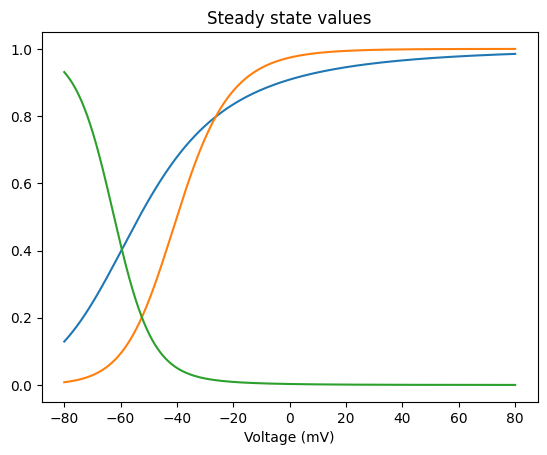

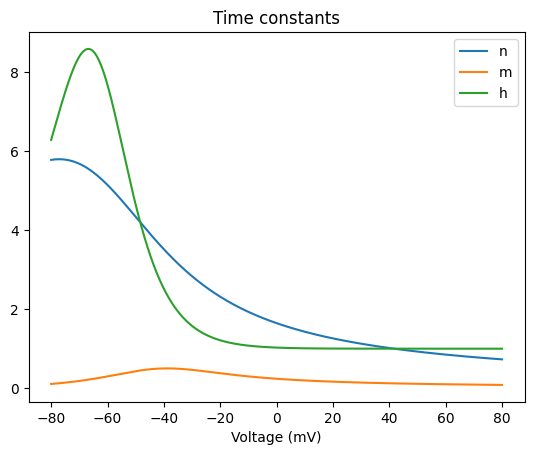

In [24]:
#绘图
plt.clf()

# 稳定态
plt.plot(V, inf_n)
plt.plot(V, inf_m)
plt.plot(V, inf_h)
plt.title('Steady state values') 
plt.xlabel('Voltage (mV)')
plt.show()

plt.plot(V, tau_n)
plt.plot(V, tau_m)
plt.plot(V, tau_h)
plt.title('Time constants') 
plt.xlabel('Voltage (mV)')
plt.legend(['n', 'm', 'h'])
plt.show()

In [25]:
# Hodgkin-Huxley Model的参数：以乌贼巨轴突为例

# 平衡电位
E_Na = 50.0
E_K = -77.0
E_L = -54.387

# 最大电导
g_Na = 120.0
g_K = 36.0
g_L = 0.03

# 时间
dt = 0.01                               # 时间步长
T = 40                                  # 最大时间
t = np.arange(0, T, 0.01)               # 时间序列

# 温度因子
Q10 = 3.0                               # 温度升高10℃的速率比
T_base = 6.3                            # 基准温度
T = 6.3                                 # 为简化计算，假设温度不变，即变化后温度仍是6.3℃
phi = Q10 ** ((T - T_base) / 10)        # 温度因子Φ

# 初始化膜电位和门控变量的序列
V = np.zeros(len(t))
n = np.zeros(len(t))
m = np.zeros(len(t))
h = np.zeros(len(t))

# 初值
V[0] = -70.68
h[0] = 0.772
m[0] = 0.0266
n[0] = 0.235

# 其他参数
I_E = 0.0                               # 外部电流刺激
C = 1.0                                 # 电容

In [26]:
# 模拟刺激

# 延迟1000ms后发放持续500ms的电流刺激，电流大小为8mA
for i in range(1, len(t)):
    if i == 1000:
        I_E = 8
    if i == 1500:
        I_E = 0.0
        
    # 门控变量转化速率（代码同上）
    # 钾离子通道亚基激活
    alpha_n = 0.01 * (V[i - 1] + 55) / (1 - np.exp(-(V[i - 1] + 55) / 10))    # 阀门从开到关的速率
    beta_n = 0.125 * np.exp(-((V[i - 1] + 65) / 80))                          # 阀门从关到开的速率
    # 钠离子通道亚基激活
    alpha_m = 0.1 * (V[i - 1] + 40) / (1 - (np.exp(-(V[i - 1] + 40) / 10)))   # 阀门从开到关的速率
    beta_m = 4 * (np.exp(-(V[i - 1] + 65) / 18))                              # 阀门从关到开的速率
    # 钠离子通道亚基失活
    alpha_h = 0.07 * np.exp(-((V[i - 1] + 65) / 20))                          # 阀门从开到关的速率
    beta_h = 1 / (1 + np.exp(-(V[i - 1] + 35) / 10))                          # 阀门从关到开的速率
    
    # 求解门控变量的微分（代码同上）
    # 钾离子通道亚基激活
    tau_n = 1 / (alpha_n + beta_n)                                            # 时间常数τn
    inf_n = alpha_n * tau_n                                                   # 稳定态n∞
    # 钠离子通道亚基激活
    tau_m = 1 / (alpha_m + beta_m)                                            # 时间常数τm
    inf_m = alpha_m * tau_m                                                   # 稳定态n∞
    # 钠离子通道亚基失活
    tau_h = 1 / (alpha_h + beta_h)                                            # 时间常数τh
    inf_h = alpha_h * tau_h                                                   # 稳定态n∞
    
    # 更新门控变量
    '''
    dx/dt = phi * [α * (1 - x) - β * x] = phi * [(x∞ - x) / τx]
    利用欧拉法：y[n + 1] = y[n] + t * f(x, y)，即 y[n + 1] = y[n] + 步长dx * 微分dy/dx
    综上，有x[i + 1] = x[i] + dt * dx/dt 
                     = x[i] + dt * [Φ * (α - (α + β) * x)] 
                     = (1 - dt * Φ / τx) * n[i - 1] + (dt * Φ / τx) * x∞
    '''
    n[i]  = (1 - dt * phi / tau_n) * n[i - 1] + (dt * phi / tau_n) * inf_n
    m[i]  = (1 - dt * phi / tau_m) * m[i - 1] + (dt * phi / tau_m) * inf_m
    h[i]  = (1 - dt * phi / tau_h) * h[i - 1] + (dt * phi / tau_h) * inf_h

    # 更新离子通道电流
    I_Na = g_Na * (m[i] ** 3) * h[i] * (V[i - 1] - E_Na)                      # 钠离子通道
    I_K = g_K * (n[i] ** 4) * (V[i - 1] - E_K)                                # 钾离子通道
    I_L = g_L * (V[i - 1] - E_L)                                              # 泄露通道
    
    # 使用欧拉法更新膜电位V
    dvdt = (I_E - (I_Na + I_K + I_L)) / C
    V[i]  = V[i - 1] + dt * dvdt

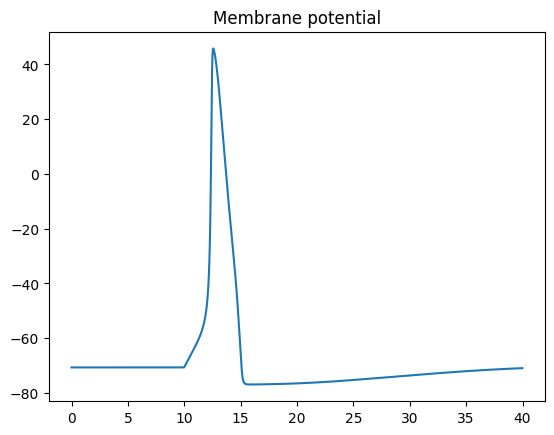

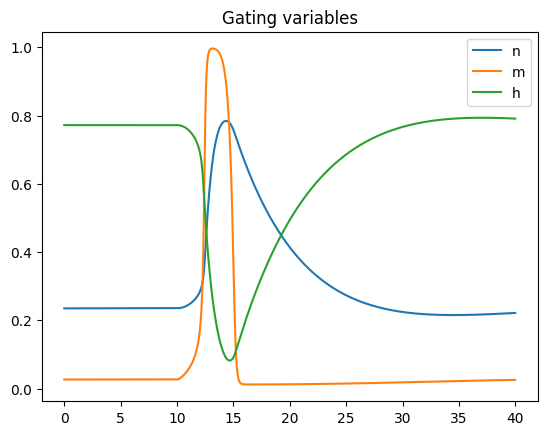

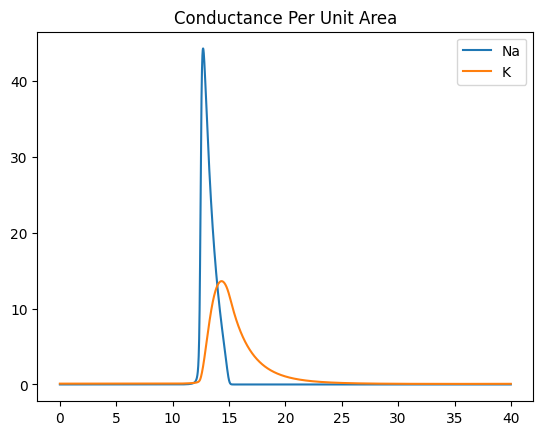

In [27]:
# 绘图
plt.clf()

# 膜电位
plt.plot(t, V)
plt.title('Membrane potential')
plt.show()

# 门控变量
plt.plot(t, n)
plt.plot(t, m)
plt.plot(t, h)
plt.title('Gating variables')
plt.legend(['n', 'm', 'h'])
plt.show()

# 单位面积电导
plt.plot(t, g_Na * h * m ** 3)
plt.plot(t, g_K * n ** 4)
plt.title('Conductance Per Unit Area')
plt.legend(['Na', 'K'])
plt.show()